In [4]:
from fastai.vision.all import *

In [12]:
dataset_dir = untar_data(URLs.MNIST)

In [13]:
dataset_dir

Path('/home/gg/.fastai/data/mnist_png')

In [21]:
Path.ls(dataset_dir/'testing/3')

(#1010) [Path('/home/gg/.fastai/data/mnist_png/testing/3/6030.png'),Path('/home/gg/.fastai/data/mnist_png/testing/3/3944.png'),Path('/home/gg/.fastai/data/mnist_png/testing/3/8864.png'),Path('/home/gg/.fastai/data/mnist_png/testing/3/1490.png'),Path('/home/gg/.fastai/data/mnist_png/testing/3/1742.png'),Path('/home/gg/.fastai/data/mnist_png/testing/3/493.png'),Path('/home/gg/.fastai/data/mnist_png/testing/3/1069.png'),Path('/home/gg/.fastai/data/mnist_png/testing/3/9750.png'),Path('/home/gg/.fastai/data/mnist_png/testing/3/9742.png'),Path('/home/gg/.fastai/data/mnist_png/testing/3/8607.png')...]

In [22]:
Path.ls(dataset_dir/'training/3')

(#6131) [Path('/home/gg/.fastai/data/mnist_png/training/3/22204.png'),Path('/home/gg/.fastai/data/mnist_png/training/3/7156.png'),Path('/home/gg/.fastai/data/mnist_png/training/3/57817.png'),Path('/home/gg/.fastai/data/mnist_png/training/3/43393.png'),Path('/home/gg/.fastai/data/mnist_png/training/3/15335.png'),Path('/home/gg/.fastai/data/mnist_png/training/3/55008.png'),Path('/home/gg/.fastai/data/mnist_png/training/3/35093.png'),Path('/home/gg/.fastai/data/mnist_png/training/3/459.png'),Path('/home/gg/.fastai/data/mnist_png/training/3/1336.png'),Path('/home/gg/.fastai/data/mnist_png/training/3/29608.png')...]

In [71]:
dataset=Path.ls(dataset_dir/'training/3')
valid=Path.ls(dataset_dir/'testing/3')

In [24]:
dataset[0]

Path('/home/gg/.fastai/data/mnist_png/training/3/22204.png')

In [26]:
im3 = Image.open(dataset[0])

In [27]:
im3

In [31]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   4],
        [  0,   0,   0,   5,  25,  91],
        [  0,   0,   0,  49, 252, 252],
        [  0,   5,  49,  88, 252, 252],
        [  0,  25, 252, 252, 252, 252]], dtype=torch.uint8)

In [72]:
dataset_tensor = [tensor(Image.open(x)) for x in dataset]
valid_tensor = [tensor(Image.open(x)) for x in valid]

In [36]:
len(dataset_tensor)

6131

In [73]:
dataset_stacked = torch.stack(dataset_tensor).float()/255
valid_stacked = torch.stack(valid_tensor).float()/255

In [40]:
dataset_stacked.shape

torch.Size([6131, 28, 28])

How the mean of the threes look like.

<AxesSubplot:>

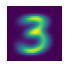

In [44]:
show_image(dataset_stacked.mean(axis=0))

Distance of an image from the mean image.

In [47]:
a_3 = dataset_stacked[0]

In [48]:
F.l1_loss(a_3,dataset_stacked.mean(axis=0))

tensor(0.1762)

In [50]:
F.mse_loss(a_3,dataset_stacked.mean(axis=0)).sqrt()

tensor(0.3170)

Doing the same for each item in the stack along xy axis.

In [54]:
(dataset_stacked-dataset_stacked.mean(axis=0)).abs().mean((-1,-2))

tensor([0.1762, 0.1062, 0.1306,  ..., 0.1214, 0.1277, 0.1240])

In [74]:
dataset_mean=dataset_stacked.mean(axis=0)
valid_mean=valid_stacked.mean(axis=0)

Making a function.

In [75]:
def mnist_distance(a,b) : return (a-b).abs().mean((-1,-2))

In [76]:
mnist_distance(dataset_stacked,dataset_mean)

tensor([0.1762, 0.1062, 0.1306,  ..., 0.1214, 0.1277, 0.1240])

In [77]:
mnist_distance(valid_stacked,valid_mean)

tensor([0.1568, 0.1098, 0.1045,  ..., 0.1256, 0.1275, 0.1266])